# Explorating visualization of ENEM 2016

**ENEM** is the National Exam of High School, the main way to acess the Public University in Brazil. In 2016, there were more than 228 thousand of University vagues, mostly the Federal unis, such like Federal University of Rio de Janeiro, Federal University of Minas Gerais and since ENEM 2016, the University of São Paulo.

ENEM also permitts you to get a scholarship in private unis, by ProUni. Until 2016, ENEM was able to get you a degree for the people who did not graduate in regular time.

Here, we did an exploratory visualization of the microdata of ENEM 2016, with information of all the participants of the test. We managed to only work with **Minas Gerais** data, because we thought it was a state with a lot of similarities with Brazil itself. We only wanted to work with the grade in the Mathematics test, due our untrivial interest in this science.

In [1]:
from IPython.display import display, HTML
import pandas as pd
import pickle
import matplotlib.pyplot as plt
MINAS = pd.read_pickle('enem_2016_minas.pkl') #Here we use this pickle: 
## https://drive.google.com/open?id=1vTWRTok9ldvtYMmEUNTZYv0JaGbRRNII

In [16]:
list(MINAS)
a = ''
for item in MINAS:
    a = a + ', ' + item
a
#All the data. You can read the dictionary to this tags in 
## https://drive.google.com/file/d/1zYSiqmf_Ov21EMM7-F6WPevVA6fHvtvl/view?usp=sharing

', NU_INSCRICAO, NU_ANO, CO_MUNICIPIO_RESIDENCIA, NO_MUNICIPIO_RESIDENCIA, CO_UF_RESIDENCIA, SG_UF_RESIDENCIA, NU_IDADE, TP_SEXO, TP_ESTADO_CIVIL, TP_COR_RACA, TP_NACIONALIDADE, CO_MUNICIPIO_NASCIMENTO, NO_MUNICIPIO_NASCIMENTO, CO_UF_NASCIMENTO, SG_UF_NASCIMENTO, TP_ST_CONCLUSAO, TP_ANO_CONCLUIU, TP_ESCOLA, TP_ENSINO, IN_TREINEIRO, CO_ESCOLA, CO_MUNICIPIO_ESC, NO_MUNICIPIO_ESC, CO_UF_ESC, SG_UF_ESC, TP_DEPENDENCIA_ADM_ESC, TP_LOCALIZACAO_ESC, TP_SIT_FUNC_ESC, IN_BAIXA_VISAO, IN_CEGUEIRA, IN_SURDEZ, IN_DEFICIENCIA_AUDITIVA, IN_SURDO_CEGUEIRA, IN_DEFICIENCIA_FISICA, IN_DEFICIENCIA_MENTAL, IN_DEFICIT_ATENCAO, IN_DISLEXIA, IN_DISCALCULIA, IN_AUTISMO, IN_VISAO_MONOCULAR, IN_OUTRA_DEF, IN_SABATISTA, IN_GESTANTE, IN_LACTANTE, IN_IDOSO, IN_ESTUDA_CLASSE_HOSPITALAR, IN_SEM_RECURSO, IN_BRAILLE, IN_AMPLIADA_24, IN_AMPLIADA_18, IN_LEDOR, IN_ACESSO, IN_TRANSCRICAO, IN_LIBRAS, IN_LEITURA_LABIAL, IN_MESA_CADEIRA_RODAS, IN_MESA_CADEIRA_SEPARADA, IN_APOIO_PERNA, IN_GUIA_INTERPRETE, IN_MACA, IN_COMPUTAD

## Gender analysis
Here we want to see the possible diferences between male and female participants.

In [4]:
sort = MINAS.sort_values(by=['NU_NOTA_MT'], ascending=False)
TESTE = sort[['NU_NOTA_MT','NU_IDADE', 'TP_SEXO']]

In [14]:
TESTE.dropna(axis=0, how='any')
TESTE.head()

,NU_NOTA_MT,NU_IDADE,TP_SEXO
1254190,991.5,19.0,M
2809767,991.5,26.0,M
4649479,991.5,25.0,F
799655,991.5,17.0,F
1549642,991.5,17.0,M


In [8]:
TESTE.groupby(['TP_SEXO'])['NU_NOTA_MT'].describe()

,count,mean,std,min,25%,50%,75%,max
TP_SEXO,,,,,,,,
F,376193.0,490.981906,102.592931,0.0,413.6,470.2,550.4,991.5
M,266301.0,536.515841,118.334317,0.0,442.9,520.8,616.2,991.5


# Age analysis
Here we want to analyse the average grade in all ages. Again, people of all ages take ENEM to join University or graduate in High School. We ploted all ages but after 60 there was a lot of noise. 

## Average by age

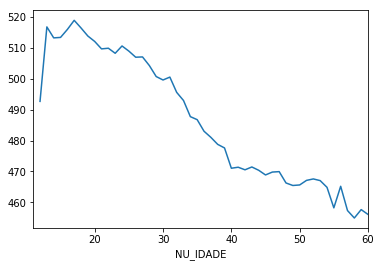

In [10]:
media_idade = TESTE.groupby(['NU_IDADE'])['NU_NOTA_MT'].mean()
media_idade_60 = TESTE[TESTE['NU_IDADE']<=60].groupby(['NU_IDADE'])['NU_NOTA_MT'].mean()
media_idade = media_idade_60
media_idade.plot()
plt.show()

## Certification of Conclusion by age

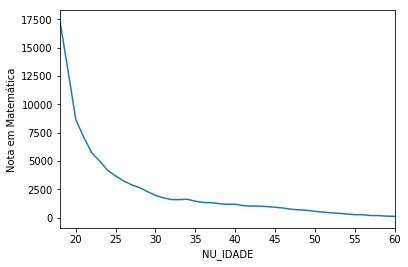

In [24]:
## ME CORRIJA!
## EU só queria ser uma célula onde estou a proporção e não em numero absoluto '-'

c = sort[['IN_CERTIFICADO','NU_IDADE']]
c = c[c['NU_IDADE']<=60] 
c = c[c['IN_CERTIFICADO']==1].groupby('NU_IDADE')['IN_CERTIFICADO'].count()
c.plot()
plt.show()

# Ethnicity analysis

In [18]:
raca = sort[['NU_NOTA_MT','TP_COR_RACA']]
C= raca.groupby(['TP_COR_RACA'])['NU_NOTA_MT'].mean()
C
# 0 = Not Declares
# 1 = White
# 2 = Black
# 3 = Brown
# 4 = Yellow
# 5 = Indigenous
# 6 = No data

TP_COR_RACA
0    553.948973
1    532.818724
2    483.500812
3    500.063269
4    491.847148
5    472.061667
6    536.381818
Name: NU_NOTA_MT, dtype: float64

At this analisys we can see how ethinicity affects the grades in ENEM.  

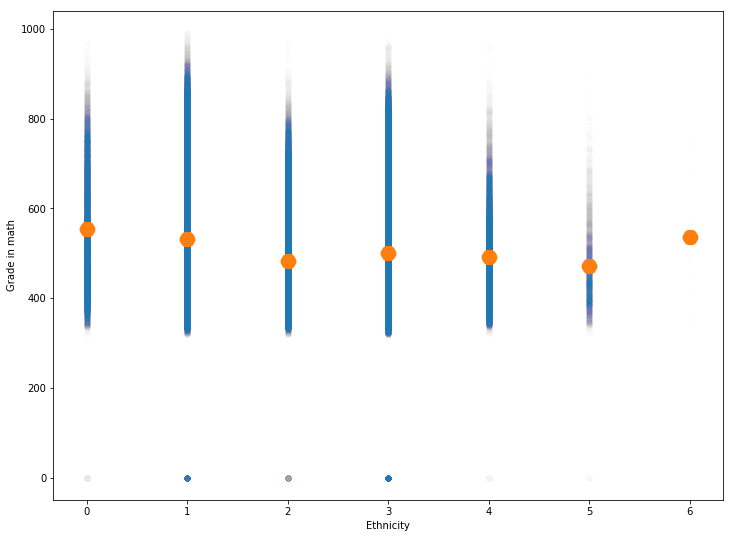

In [36]:
plt.rcParams["figure.figsize"] = [12, 9]
raca = sort[['NU_NOTA_MT','TP_COR_RACA']]
B = raca['TP_COR_RACA']
A = raca['NU_NOTA_MT']
plt.xlabel("Ethnicity")
plt.ylabel("Grade in math")
plt.scatter(B, A, alpha=0.002)
plt.scatter(list(range(0,7)), C, marker='H', linewidths=10)
plt.show()
# 0 = Not Declares
# 1 = White
# 2 = Black
# 3 = Brown
# 4 = Yellow
# 5 = Indigenous
# 6 = No data

# Family analysis
Here, we want to discover how much family data can influence the grade in math.

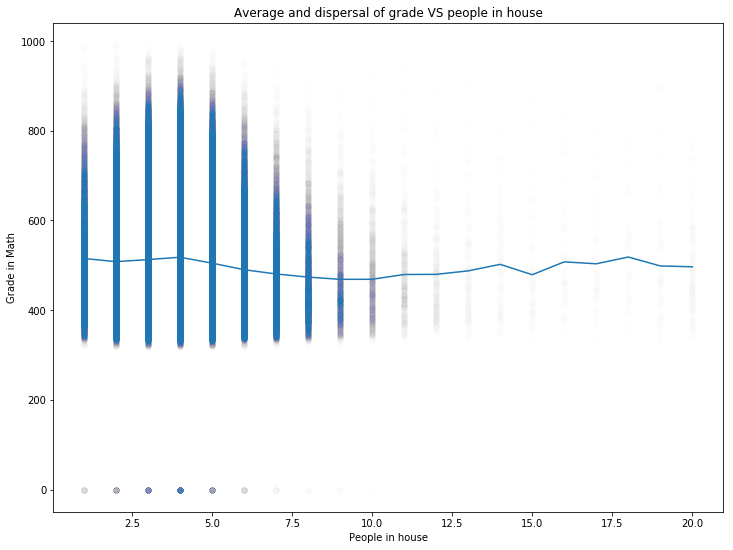

In [40]:
FAMILIA = MINAS[['NU_NOTA_MT', 'Q005']] #Q005 = How much people are living with the participant in the same house.
A, B = list(FAMILIA['NU_NOTA_MT']), list(FAMILIA['Q005'])
C = list(FAMILIA.groupby(['Q005']).mean()['NU_NOTA_MT'])
plt.xlabel("People in house")
plt.ylabel("Grade in Math")
plt.scatter(B, A, alpha=0.002)
plt.plot(list(range(1, 21)), C)
plt.title('Average and dispersal of grade VS people in house')
plt.show()

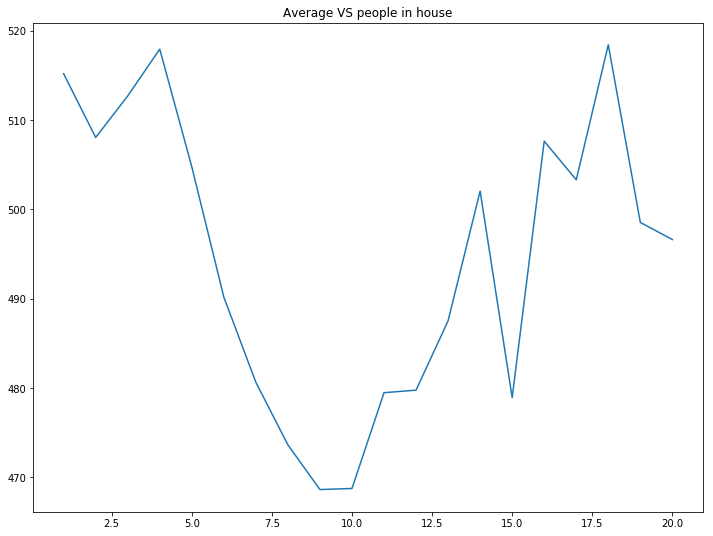

In [41]:
plt.plot(list(range(1, 21)), C)
plt.title('Average VS people in house')
plt.show()